In [1]:
%run init.ipynb

### Notas de aula de Computação Quântica <br> Autor: Jonas Maziero

# Algoritmo de Grover

Suponha que temos um espaço amostral com 
$$N=2^{n} \text{ amostras},$$
com $n\in\mathbb{N}_{+}$. Focaremos nos índices das amostras, mais que nos seus valores. Com isso, vemos que os valores do índice podem ser armazenados usando $n$ qubits. O problema que queremos resolver é encontrar $1\le M \le N$ soluções, que são amostras que possuem uma determinada propriedade. Por definição, para
$$x = 0,\cdots, 2^{n}-1,$$
temos que
\begin{cases}
f(x) = 1 \text{ se } x \text{ é solução}, \\
f(x) = 0 \text{ se } x \text{ não é solução}.
\end{cases}

Vamos supor que nos é dado um __oráculo__, que consegue reconhecer soluções e que é representado pela matriz unitária $U_{f}$ cuja ação na base computacional é
$$U_{f}|x\rangle|y\rangle = |x\rangle|y\oplus f(x)\rangle,$$
$x$ é o índice do registro quântico utilizado para representar os dados, $|y\rangle$ é o estado inicial do qubit auxiliar e $\oplus$ é a soma módulo 2. Por exemplo, podemos verificar se $x$ é solução preparando $|x\rangle|0\rangle$ e verificando se o qubit auxiliar é invertido para $|1\rangle$.

Assim como no algoritmo de Deutsch-Jozsa, no algoritmo de Grover inicializamos o qubit auxiliar no estado $|-\rangle$. Teremos assim que
\begin{align}
U_{f}|x\rangle|-\rangle & = \frac{1}{\sqrt{2}}\Big(U_{f}|x\rangle|0\rangle - U_{f}|x\rangle|1\rangle\Big) \\
& = \frac{1}{\sqrt{2}}\Big(|x\rangle|0\oplus f(x)\rangle - |x\rangle|1\oplus f(x)\rangle\Big) \\
& = \frac{1}{\sqrt{2}}\Big(|x\rangle|f(x)\rangle - |x\rangle|\bar{f(x)}\rangle\Big) \\
& = (-1)^{f(x)}|x\rangle|-\rangle.
\end{align}

Ou seja, a ação do oráculo, $|x\rangle\rightarrow (-1)^{f(x)}|x\rangle$, é marcar as soluções com uma fase $e^{i\pi}=-1$.

Vamos começar considerando o caso em que buscamos uma __única solução__ $|x'\rangle$. 

Não é difícil ver que a transformação unitária
\begin{align}
U_{o} & = I-2|x'\rangle\langle x'| \\
& = \sum_{x=0}^{N-1}|x\rangle\langle x|-2|x'\rangle\langle x'| = \sum_{x\ne x'}|x\rangle\langle x|-|x'\rangle\langle x'|,
\end{align}
que atua somente nos $n$ qubits, não muda estados $|x\rangle$ ortogonais a $|x'\rangle$ e que adiciona uma fase $e^{i\pi}=-1$ ao estado $|x'\rangle$. Ou seja, $U_{o}$ tem o mesmo efeito que $U_{f}$.

__Exercício:__ Verifique que o operador $U_{o} = I-2|x'\rangle\langle x'|$ é unitário.

O algoritmo de Grover começa preparando o chamado _estado de Hadamard_
\begin{align}
|h\rangle & = H^{\otimes n}|0\rangle^{\otimes n} = |+\rangle^{\otimes n} = \frac{1}{\sqrt{N}}\sum_{x=0}^{N-1}|x\rangle \\
& = \frac{1}{\sqrt{N}}|x'\rangle + \frac{1}{\sqrt{N}}\sum_{x\ne x'}|x\rangle = \frac{1}{\sqrt{N}}|x'\rangle + \sqrt{\frac{N-1}{N}}|x'_{\perp}\rangle \\
& =:  \sin\theta|x'\rangle + \cos\theta|x'_{\perp}\rangle,
\end{align}
em que definimos
$$\theta = \arcsin\big(1/\sqrt{N}\big) = \arccos\big(\sqrt{(N-1)/N}\big)$$
e
$$|x'_{\perp}\rangle := \frac{1}{\sqrt{N-1}}\sum_{x\ne x'}|x\rangle.$$

Seguindo, definimos
$$|h_{\perp}\rangle = \cos\theta|x'\rangle - \sin\theta|x'_{\perp}\rangle.$$

__Exercício:__ Verificar que
\begin{cases}
|x'\rangle = \sin\theta|h\rangle + \cos\theta|h_{\perp}\rangle, \\
|x'_{\perp}\rangle = \cos\theta|h\rangle - \sin\theta|h_{\perp}\rangle.
\end{cases}

Teremos assim que
\begin{align}
U_{o}|h\rangle & = \sin\theta U_{o}|x'\rangle + \cos\theta U_{o}|x'_{\perp}\rangle \\
& = -\sin\theta |x'\rangle + \cos\theta |x'_{\perp}\rangle \\
& = -\sin\theta\big(\sin\theta|h\rangle + \cos\theta|h_{\perp}\rangle\big) + \cos\theta\big(\cos\theta|h\rangle - \sin\theta|h_{\perp}\rangle\big) \\
& = \big(-\sin^{2}\theta+\cos^{2}\theta\big)|h\rangle + \big(-\sin\theta\cos\theta-\sin\theta\cos\theta\big)|h_{\perp}\rangle \\
& = \cos(2\theta)|h\rangle - \sin(2\theta)|h_{\perp}\rangle.
\end{align}

Se olharmos para o "plano" ($|x'\rangle,|x'_{\perp}\rangle$), vemos que a ação de $U_{o}$ (do oráculo) é refletir o vetor $|h\rangle$ em relação ao eixo $|x'_{\perp}\rangle$. 

Seguindo, definimos o seguinte operador unitário:
$$U_{h} := 2|h\rangle\langle h|-I.$$

__Exercício:__ Verificar que o operador $U_{h}$ é unitário.

Esse operador não modifica o estado $|h\rangle$ mas dá uma fase $e^{i\pi}=-1$ a todo estado ortogonal a $|h\rangle$. Usando esse operador, podemos escrever
\begin{align}
U_{h}U_{o}|h\rangle & = \cos(2\theta)U_{h}|h\rangle - \sin(2\theta)U_{h}|h_{\perp}\rangle \\
& = \cos(2\theta)|h\rangle + \sin(2\theta)|h_{\perp}\rangle \\
&  = \cos(2\theta)\big(\sin\theta|x'\rangle + \cos\theta|x'_{\perp}\rangle\big) + \sin(2\theta)\big(\cos\theta|x'\rangle - \sin\theta|x'_{\perp}\rangle\big) \\
&  = \big(\cos(2\theta)\sin\theta + \sin(2\theta)\cos\theta \big)|x'\rangle + \big(\cos(2\theta)\cos\theta - \sin(2\theta)\cos\theta \big)|x'_{\perp}\rangle \\
&  = \sin(3\theta)|x'\rangle + \cos(3\theta)|x'_{\perp}\rangle.
\end{align}

Ou seja, o operador $U_{h}$ reflete o estado em relação a $|h\rangle$. Veja a ilustração na figura abaixo.
<img src = 'fig_grover.png' width = '300'>

A composição dessas duas operações unitárias, 
$$G = U_{h}U_{o},$$
que é chamada de _iteração de Grover_, leva o estado inicial $|h\rangle$, que está a um ângulo $\pi/2-\theta$ da solução $|x'\rangle$, em um estado 
$$|g_{1}\rangle = G|h\rangle$$
que está mais próximo, a um ângulo $\pi/2-3\theta$, da solução.

Aplicando a iteração de Grover mais uma vez, teremos
\begin{align}
|g_{2}\rangle & = G|g_{1}\rangle = U_{h}U_{o}|g_{1}\rangle \\
& = U_{h}\Big(\sin(3\theta)U_{o}|x'\rangle + \cos(3\theta)U_{o}|x'_{\perp}\rangle\Big) \\
& = U_{h}\Big(-\sin(3\theta)|x'\rangle + \cos(3\theta)|x'_{\perp}\rangle\Big) \\
& = U_{h}\Big(-\sin(3\theta)\big(\sin\theta|h\rangle + \cos\theta|h_{\perp}\rangle\big) + \cos(3\theta)\big(\cos\theta|h\rangle - \sin\theta|h_{\perp}\rangle\big)\Big) \\
& = U_{h}\Big( \big(-\sin(3\theta)\sin\theta + \cos(3\theta)\cos\theta\big)|h\rangle - \big( \sin(3\theta)\cos\theta + \cos(3\theta)\sin\theta \big)|h_{\perp}\rangle\big)  \\
& = \cos(4\theta)U_{h}|h\rangle - \sin(4\theta)U_{h}|h_{\perp}\rangle \\
& = \cos(4\theta)|h\rangle + \sin(4\theta)|h_{\perp}\rangle \\
& = \cos(4\theta)\big(\sin\theta|x'\rangle + \cos\theta|x'_{\perp}\rangle\big) + \sin(4\theta)\big(\cos\theta|x'\rangle - \sin\theta|x'_{\perp}\rangle\big) \\
& = \big(\cos(4\theta)\sin\theta+\sin(4\theta)\cos\theta\big)|x'\rangle + \big(\cos(4\theta)\cos\theta-\sin(4\theta)\sin\theta\big)|x'_{\perp}\rangle \\
& = \sin(5\theta)|x'\rangle + \cos(5\theta)|x'_{\perp}\rangle.
\end{align}

Generalizando, vemos que para a $j$-ésima iteração de Grover, teremos
\begin{align}
|g_{j}\rangle & = G^{j}|h\rangle \\
& = \sin((2j+1)\theta)|x'\rangle + \cos((2j+1)\theta)|x'_{\perp}\rangle.
\end{align}

Para que 
$$|g_{j}\rangle = |x'\rangle,$$
temos que ter
\begin{align}
(2j+1)\theta = \frac{\pi}{2} \ \therefore\ j = \frac{\pi}{4\theta} - \frac{1}{2} \approx \frac{\pi\sqrt{N}}{4} - \frac{1}{2} = \mathcal{O}\big(\sqrt{N}\big).
\end{align}
em que usamos que 
$$\theta \approx \sin\theta = \frac{1}{\sqrt{N}}$$
para $N\gg1$. Fica assim estabelecido, em termos do número de consultas ao oráculo, o ganho quadrático do algoritmo de Grover em relação ao caso clássico. O circuito quântico para implementação do algoritmo de Grover está ilustado na figura abaixo.
<img src = 'fig_grover_qc.png' width = '500'>

In [165]:
N = 2**10; th = asin(1/sqrt(N)); N, float(th), float(sin(th)), float(th*180/pi), sqrt(N)

Com relação à implementação do algoritmo de Grover, vale observar que
\begin{align}
U_{h} & = 2|h\rangle\langle h|-I = 2H^{\otimes n}|0\rangle\langle 0|H^{\otimes n}-I = H^{\otimes n}\big(2|0\rangle\langle 0|-I\big)H^{\otimes n} \\
& = H^{\otimes n}U_{z}H^{\otimes n},
\end{align}
em que definimos 
$$U_{z} := 2|0\rangle\langle 0|-I,$$
que adiciona uma fase $e^{i\pi}=-1$ a todos os estados da base computacional, com excessão de $|0\rangle\equiv|0\rangle^{\otimes n}$.

O circuito quântico para a iteração de Grover, que também é chamada de operação de amplificação de amplitude, está ilustrado na figura abaixo.
<img src = 'fig_grover_G.png' width = '500'>

Com relação à implementação de $U_{z}$, começamos notando que a operação $Z$ multicontrolada,
$$MCZ = \sum_{j_{0},\cdots,j_{n-2}\ne 1,\cdots,1}|j_{0}\rangle\langle j_{0}|\otimes\cdots\otimes|j_{n-2}\rangle\langle j_{n-2}|\otimes I + |1\rangle\langle 1|\otimes\cdots\otimes|1\rangle\langle 1|\otimes Z,$$
troca o sinal do estado $|n-1\rangle$, i.e.,
$$|1\cdots 1\rangle \rightarrow -|1\cdots 1\rangle.$$
Os outros estados da base computacional não mudam pela ação de $MCZ$. 

No entanto, a porta lógica quântica $MCZ$ não está diratamente implementada no IBMQ. Temo já implementada a NOT multicontrolada:
$$MCX = \sum_{j_{0},\cdots,j_{n-2}\ne 1,\cdots,1}|j_{0}\rangle\langle j_{0}|\otimes\cdots\otimes|j_{n-2}\rangle\langle j_{n-2}|\otimes I + |1\rangle\langle 1|\otimes\cdots\otimes|1\rangle\langle 1|\otimes X.$$
Lembrando, a ação de $Z$ na base $\{|0\rangle,|1\rangle\}$ é equivalente à ação de $X$ na base $\{|+\rangle,|-\rangle\} = \{H|0\rangle,H|1\rangle\}$. Vemos assim que
$$MCZ = \big(I\otimes\cdots \otimes I\otimes H\big)MCX\big(I\otimes\cdots \otimes I\otimes H\big).$$

Com isso conseguimos trocar o sinal de $|1\cdots 1\rangle$, mas o que queremos é trocar o sinal de $|0\cdots 0\rangle$ em relação aos outros estados da base computacional, ou vice versa. Para isso, antes de aplicar $MCZ$, invertemos os qubits:
$$U_{z} = (XZXZ\otimes I\otimes\cdots\otimes I)(X\otimes\cdots\otimes X)\big(I\otimes\cdots \otimes I\otimes H\big)MCX\big(I\otimes\cdots \otimes I\otimes H\big)(X\otimes\cdots\otimes X).$$

Em relação ao sinal de $-$ global, temos que
$$\sigma_{j}\sigma_{k} = \delta_{j,k}\sigma_{0} + \epsilon_{jkl}i\sigma_{l}.$$
Para $j\ne k$ teremos
\begin{align}
\sigma_{j}\sigma_{k}\sigma_{j}\sigma_{k} = \epsilon_{jkl}i\sigma_{l}\epsilon_{jkl}i\sigma_{l} = -\epsilon_{jkl}^{2}\sigma_{l}^{2} = -\sigma_{0}
\end{align}
para $l\ne j$ e $l\ne k$. Também usamos $\sigma_{l}^{2}=\sigma_{0}$.

## Implementação no IBMQ

### Clássico

In [28]:
my_list = [1,3,5,2,4,9,5,8,0,7,6]

In [29]:
def my_oracle(my_input):
    solution = 2
    if my_input == solution:
        response = True
    else:
        response = False
    return response

In [30]:
my_input = 7; res = my_oracle(my_input); print(res)

False


__Classicamente__ a complexidade computacional desse problema é 
$$\mathcal{O}(N).$$
Podemos encontrar o item procurado na primeira consulta ao oráculo se seu índice for $0$. Mas também podemos encontrar esse item na $N$-ésima consulta, se seu índice for $N-1$. Em média usaremos $N/2$ consultas ao oráculo. Uma busca clássica está implementada no código abaixo.

In [32]:
for j in range(0,len(my_list)):
    if my_oracle(my_list[j]) == True:
        print('Solução encontrada no índice',j, ', após ', j+1, ' consultas ao oráculo.')

Solução encontrada no índice 3 , após  4  consultas ao oráculo.


### Quântico

In [120]:
from qiskit import *
nshots = 8192
qiskit.IBMQ.load_account()
provider = qiskit.IBMQ.get_provider(hub='ibm-q', group='open', project='main')
simulator = Aer.get_backend('qasm_simulator')
device = provider.get_backend('ibmq_belem')
from qiskit.tools.monitor import job_monitor
from qiskit.tools.visualization import plot_histogram

ibmqfactory.load_account:WARNING:2021-12-13 23:59:30,535: Credentials are already in use. The existing account in the session will be replaced.


In [166]:
def qc_Uz(n): # 2|0><0| - I
    qc = QuantumCircuit(n, name = 'Uz')
    qrl = []
    for j in range(0, n):
        qrl.append(j)
    qc.z(0); qc.x(0); qc.z(0); qc.x(0)
    qc.x(qrl) # 00...0 -> 11...1 
    qc.h(n-1); qc.mcx(qrl[0:n-1],n-1); qc.h(n-1) # Cz multicontrolada. Multiplica 11...1 por -1
    qc.x(qrl); # 11...1 -> 00...0
    return qc
qc_Uz_ = qc_Uz(3); qc_Uz_.draw()

┌───┐┌───┐┌───┐┌───┐┌───┐     ┌───┐     
q_0: ┤ Z ├┤ X ├┤ Z ├┤ X ├┤ X ├──■──┤ X ├─────
     ├───┤└───┘└───┘└───┘└───┘  │  ├───┤     
q_1: ┤ X ├──────────────────────■──┤ X ├─────
     ├───┤┌───┐               ┌─┴─┐├───┤┌───┐
q_2: ┤ X ├┤ H ├───────────────┤ X ├┤ H ├┤ X ├
     └───┘└───┘               └───┘└───┘└───┘

In [167]:
def qc_Uh(n): # 2|h><h| - I
    qc = QuantumCircuit(n, name = 'Uh')
    qrl = []
    for j in range(0, n):
        qrl.append(j)
    qc.h(qrl) # transforma Uz em Uh
    qc_Uz_ = qc_Uz(n); qc.append(qc_Uz_, qrl)
    qc.h(qrl)
    return qc
qc_Uh_ = qc_Uh(3); qc_Uh_.draw()

┌───┐┌─────┐┌───┐
q_0: ┤ H ├┤0    ├┤ H ├
     ├───┤│     │├───┤
q_1: ┤ H ├┤1 Uz ├┤ H ├
     ├───┤│     │├───┤
q_2: ┤ H ├┤2    ├┤ H ├
     └───┘└─────┘└───┘

In [157]:
def qc_oracle(n):
    # Nielsen & Chuang, Box 6.1 (N=4)
    qc = QuantumCircuit(n+1, name = 'Oracle')
    qc.ccx(0,1,2) # para a solução sendo o estado |11>
    return qc
qc_oracle_ = qc_oracle(2)
qc_oracle_.draw('mpl')

q_0: ──■──
       │  
q_1: ──■──
     ┌─┴─┐
q_2: ┤ X ├
     └───┘

In [158]:
def qc_grover_iteration(n):
    qc = QuantumCircuit(n+1, name = 'G')
    qrl = []
    for j in range(0, n+1):
        qrl.append(j)
    qc_oracle_ = qc_oracle(n)
    qc.append(qc_oracle_, qrl)
    qc_Uh_ = qc_Uh(n); qc.append(qc_Uh_, qrl[0:n])
    return qc
qc_grover_iteration_ = qc_grover_iteration(2)
qc_grover_iteration_.draw('mpl')

┌─────────┐┌─────┐
q_0: ┤0        ├┤0    ├
     │         ││  Uh │
q_1: ┤1 Oracle ├┤1    ├
     │         │└─────┘
q_2: ┤2        ├───────
     └─────────┘

In [159]:
def qc_hadamard_state(n): # aplica a Hadamard em n qubits
    qc = QuantumCircuit(n, name = 'H state') # começarei a não usar mais os qr[j]
    qrl = [] # lista de registros quânticos
    for j in range(0, n):
        qrl.append(j)
    qc.h(qrl) # aplica a hadamard em toda a lista de registros quânticos
    return qc
qc_hadamard_state_ = qc_hadamard_state(3); qc_hadamard_state_.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     ├───┤
q_2: ┤ H ├
     └───┘

In [168]:
def qc_grover_search(n):
    qc = QuantumCircuit(n+1, n)
    qc.x(n)
    qrl = [] # lista de registros quânticos
    for j in range(0, n+1):
        qrl.append(j)
    qc_hadamard_state_ = qc_hadamard_state(n+1); qc.append(qc_hadamard_state_, qrl)
    for j in range(0, int((math.pi*math.sqrt(2**n))/4 - 1/2)):
        qc_grover_iteration_ = qc_grover_iteration(n); qc.append(qc_grover_iteration_, qrl)
    qc.measure(qrl[0:n], qrl[0:n])
    return qc
qc_grover_search_ = qc_grover_search(2); qc_grover_search_.draw()

┌──────────┐┌────┐┌─┐   
q_0: ─────┤0         ├┤0   ├┤M├───
          │          ││    │└╥┘┌─┐
q_1: ─────┤1 H state ├┤1 G ├─╫─┤M├
     ┌───┐│          ││    │ ║ └╥┘
q_2: ┤ X ├┤2         ├┤2   ├─╫──╫─
     └───┘└──────────┘└────┘ ║  ║ 
c: 2/════════════════════════╩══╩═
                             0  1

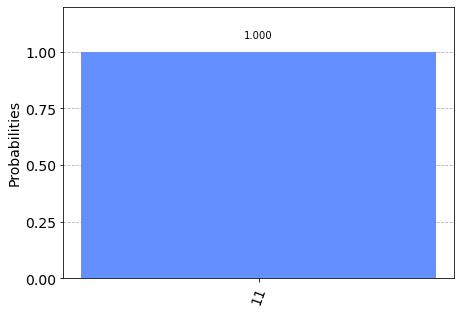

In [169]:
qc_grover_search_ = qc_grover_search(2)
result = execute(qc_grover_search_, backend = simulator, shots = nshots).result()
plot_histogram(result.get_counts(qc_grover_search_))

In [171]:
job = execute(qc_grover_search_, backend = device, shots = nshots)
job_monitor(job)

Job Status: job has successfully run


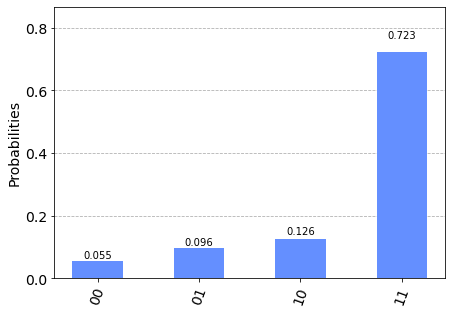

In [172]:
plot_histogram(job.result().get_counts(qc_grover_search_))

__Exercício:__ Implemente outros oráculos do Box 6.1 do Nielsen & Chuang.

##### Referências:
* Nielsen e Chuang, capítulo 6.
* https://youtu.be/IT-O-KSWlaE
* https://youtu.be/0RPFWZj7Jm0